<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/gmm-iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

各クラスを混合正規分布で近似して，事後確率を計算し，識別に利用

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import mixture

In [44]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)

n = X.shape[0]
mdim = X.shape[1]

#print(X)
#print(y)

X1 = X[y == 0,:]
X2 = X[y == 1,:]
X3 = X[y == 2,:]

Size of the data =  (150, 2)


In [45]:
# fit a Gaussian Mixture Model with three components
clf1 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf1.fit(X1)
clf2 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf2.fit(X2)
clf3 = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf3.fit(X3)

#print(clf1.score_samples(X1))

# discriminant functions
G = np.zeros((n,3))
G[:,0] = clf1.score_samples(X)
G[:,1] = clf2.score_samples(X)
G[:,2] = clf3.score_samples(X)

#print('G\n', G)

y_pred = np.argmax(G, axis=1)
print('y\n', y)
print('y_pred\n', y_pred)

print('Accuracy=', accuracy_score(y, y_pred))

print('Confusion Matrix\n', confusion_matrix(y, y_pred))

y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2
 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1 1 2
 2 1]
Accuracy= 0.8133333333333334
Confusion Matrix
 [[50  0  0]
 [ 0 36 14]
 [ 0 14 36]]


npoints= 39501


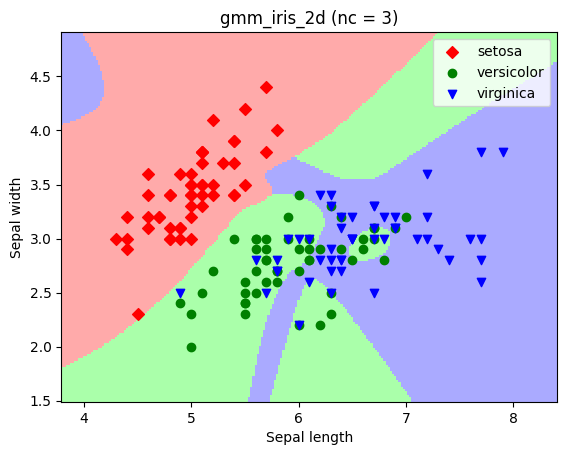

In [46]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#####
Xp = np.c_[xx.ravel(), yy.ravel()]
npoints = X_p.shape[0]
print("npoints=", npoints)
Z=[]
G=np.zeros((npoints, 3))

G[:,0] = clf1.score_samples(Xp)
G[:,1] = clf2.score_samples(Xp)
G[:,2] = clf3.score_samples(Xp)
Z = np.argmax(G, axis=1)

Z=np.asarray(Z)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('gmm_iris_2d (nc = 3)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('gmm3_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [47]:
# fit a Gaussian Mixture Model with five components
clf1 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf1.fit(X1)
clf2 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf2.fit(X2)
clf3 = mixture.GaussianMixture(n_components=5, covariance_type='full')
clf3.fit(X3)

#print(clf1.score_samples(X1))

# discriminant functions
G = np.zeros((n,3))
G[:,0] = clf1.score_samples(X)
G[:,1] = clf2.score_samples(X)
G[:,2] = clf3.score_samples(X)

#print('G\n', G)

y_pred = np.argmax(G, axis=1)
print('y\n', y)
print('y_pred\n', y_pred)

print('Accuracy=', accuracy_score(y, y_pred))

print('Confusion Matrix\n', confusion_matrix(y, y_pred))


y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_pred
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2
 2 1]
Accuracy= 0.8666666666666667
Confusion Matrix
 [[50  0  0]
 [ 0 42  8]
 [ 0 12 38]]


npoints= 39501


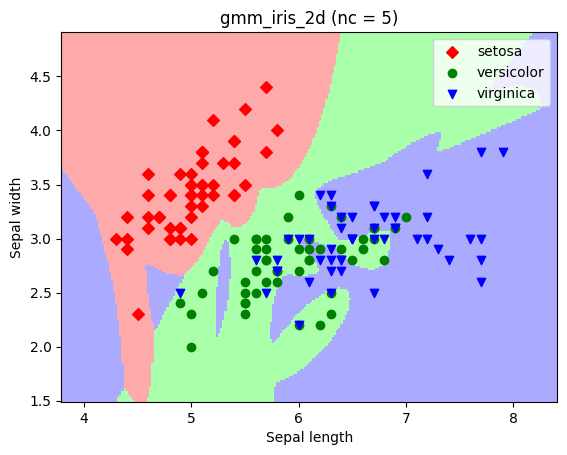

In [48]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['D', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#####
Xp = np.c_[xx.ravel(), yy.ravel()]
npoints = X_p.shape[0]
print("npoints=", npoints)
Z=[]
G=np.zeros((npoints, 3))

G[:,0] = clf1.score_samples(Xp)
G[:,1] = clf2.score_samples(Xp)
G[:,2] = clf3.score_samples(Xp)
Z = np.argmax(G, axis=1)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('gmm_iris_2d (nc = 5)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('gmm5_iris_2d.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()